In [1]:
import pyautogui
import keyboard
import time 
from PIL import ImageGrab
from PIL import Image
import numpy as np
import cv2
import pydirectinput
import torch
import numpy
import win32api, win32con

In [2]:
pyautogui.move(0, 500)

In [3]:
#PRENDRE FOTO

time.sleep(4)
pydirectinput.press("w")
im1 = pyautogui.screenshot("currentImg.jpeg", region=(0,35,2000, 985))
win32api.mouse_event(win32con.MOUSEEVENTF_MOVE, 10, 0, 0, 0)



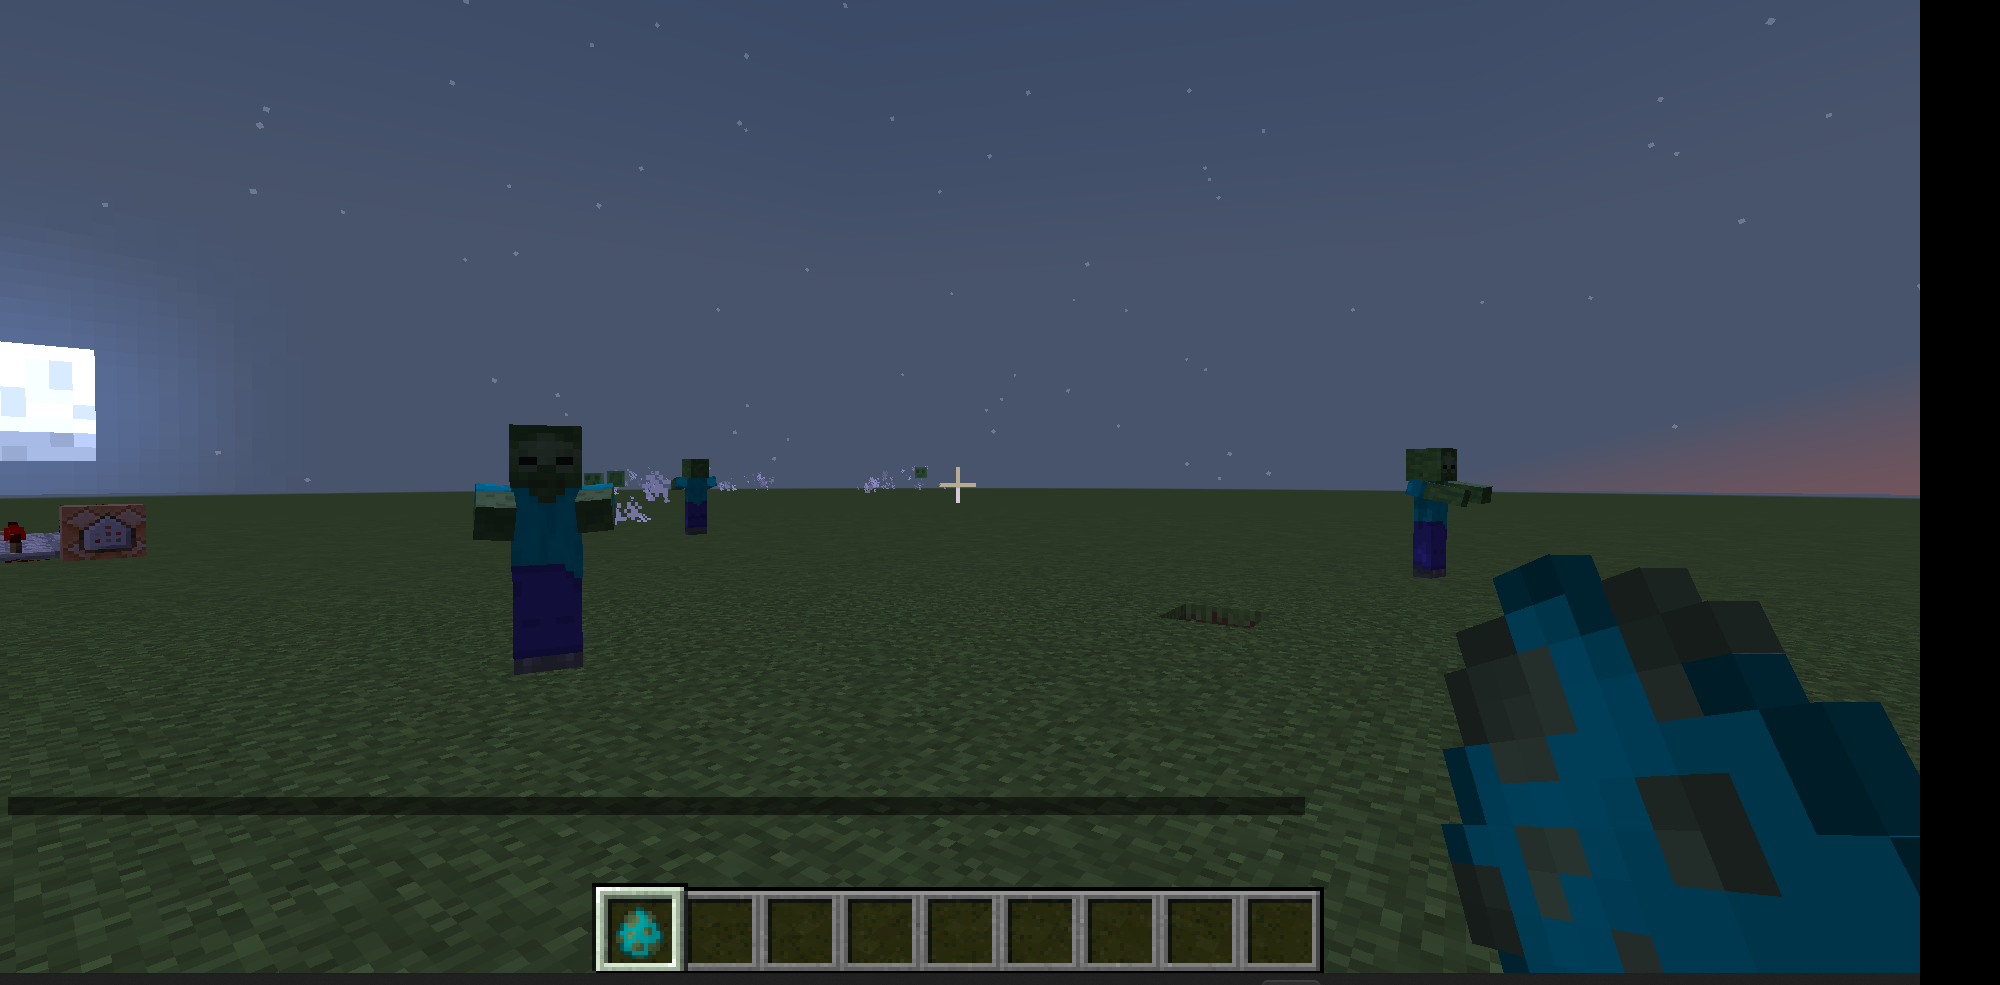

In [5]:
im1

In [6]:
#CARREGAR MODEL

from detecto.core import Model
from detecto.utils import read_image
model = Model.load('models basats.pth', ['zombie', 'pig'])

In [7]:
#

#test_image = im1  borrar si no dona problemesç

image = read_image("currentImg.jpeg")
image

array([[[ 71,  83, 107],
        [ 71,  83, 107],
        [ 71,  83, 107],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 71,  83, 107],
        [ 71,  83, 107],
        [ 71,  83, 107],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 71,  83, 107],
        [ 71,  83, 107],
        [ 71,  83, 107],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 34,  34,  34],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [8]:
labels, boxes, scores = model.predict(image)

c:\users\tomàs\appdata\local\programs\python\python36\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [9]:
def adquirir_dataset():
    threshold = 0.6
    import numpy as np
    llista_boxes = boxes.tolist()
    boxes_salvats=[]
    labels_salvats=[]
    for i in range(len(scores)):
        if scores[i]>threshold:
            labels_salvats.append(labels[i])
            boxes_salvats.append(llista_boxes[i])         #lo unic que fa és aplicar el threshhold a la detecció

    boxes_salvats_tensor = torch.FloatTensor(boxes_salvats)

    #El segon és la alçada--------------------------------------------------------------------
    #El primer es l'esquerra
    #el tercer es la dreta
    #hem de comparar el segon amb el darrer.
    distancies = []
    entitats_input = [] #Ha de ser una llista, un diccionari no pot tenir instancies diferentss amb la mateixa etiqueta

    for i in boxes_salvats_tensor:
        distancies.append(str(i[3]-i[1]))
        entitats_input.append([  int( (i[3].item()-i[1].item()) ),  (i[2].item()+i[0].item())/2 ,  (i[3].item()+i[1].item())/2 
                              ])
        #els corxetes diferencien una entitat

    for j in range(len(distancies)):
        distancies[j] = distancies[j][7:-1]   #Tallar el string

    for k in range(len(labels_salvats)):
        entitats_input[k].append(labels_salvats[k])                 #Afegim els tags als animals
        labels_salvats[k] = labels_salvats[k] + " " + distancies[k]
    return entitats_input

In [10]:
adquirir_dataset()
#boxes_salvats_tensor
#mean_local=np.mean(int(([i[3],i[1]]).item())) #i despres posar a dins de l'append.

[[246, 833.8286437988281, 454.5172882080078, 'zombie'],
 [65, 450.47247314453125, 412.4822235107422, 'zombie']]

In [11]:
from detecto.visualize import show_labeled_image
import numpy as np
show_labeled_image(image,boxes_salvats_tensor,labels_salvats) #recorda el tope de la pantalla és 1920.

NameError: name 'boxes_salvats_tensor' is not defined

In [ ]:
entitats_input #300 serà molt proper, #100 serà molt llunyà #aleshores cada 640 serà una direcció. NO NO DESCARTAT->
#QUINS SON ELS INPUTS NAI????
#ORDENAR ELS INPUTS PER DISTÀNCIA, HANDLEJAR UN MAXIM DE 5 ZOMBIES MOLT MILLOR!!!

In [ ]:
import pandas as pd
pd.DataFrame(entitats_input)

In [33]:
#Inputs: distancia absoluta, distancia horitzontal al centre box, distancia vertical al centre box.
#Outputs: Endavant, endarrere, moviment de càmera, pegar, menjar.

#cada x metres que faci un reconeixement
#possibilitat que la funcio objectiu sigui estar el mes lluny de x enemic

In [35]:
im2 = np.uint8(im1)
#cv2.imshow('image',np.uint8(im1))
#cv2.waitKey(0)
#cv2.destroyAllWindows()


In [37]:
result = cv2.matchTemplate(im2, petit, cv2.TM_CCOEFF_NORMED)
result

array([[-0.00805221, -0.00818699, -0.00838549, ...,  0.03439152,
         0.03445103,  0.03451779],
       [-0.00785379, -0.00805337, -0.00835765, ...,  0.0341853 ,
         0.03424317,  0.03430716],
       [-0.00781319, -0.00815608, -0.00854681, ...,  0.03410405,
         0.03416244,  0.03422863],
       ...,
       [ 0.07089483,  0.07079756,  0.07056481, ...,  0.17100693,
         0.17038012,  0.170069  ],
       [ 0.06908527,  0.06883868,  0.06853315, ...,  0.16991682,
         0.16919473,  0.16878277],
       [ 0.0665439 ,  0.066305  ,  0.06604744, ...,  0.16799045,
         0.16719212,  0.1666826 ]], dtype=float32)